# Interprebility 5: Test symmetries

Figuring out the symbolic formula represented by a model is ideal but sometimes too challenging. In this case, we might be content with simply figuring out some modular structures or symmetries. These hypothesis testing is partially inspired by AI Feynman.

In [1]:
from kan.hypothesis import *
import torch

Case 1: detect separability.
* Additive separability: $f(x_1, x_2, ...) = g_1(x_1,x_2) + g_2(x_3) + g_3(x_4,x_5,x_6) + ...$
* Multiplicative separability: $f(x_1, x_2, ...) = g_1(x_1,x_2)g_2(x_3)g_3(x_4,x_5,x_6)...$
* General separability: $f(x_1, x_2, x_3, ...) = h(p(x_1,x_2)+q(x_3,\cdots))$. (Note that general additive separability = general multiplicative separability)

In [2]:
f = lambda x: x[:,[0]] * x[:,[1]] + x[:,[2]] * x[:,[3]] + x[:,[4]] * x[:,[5]]
x = torch.rand(100,6) * 2 - 1
detect_separability(f, x, 'add')

add separability detected


{'hessian': tensor([[0.0000, 0.3609, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3609, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.3217, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.3217, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3472],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.3472, 0.0000]]),
 'n_groups': 3,
 'labels': [2, 2, 1, 1, 0, 0],
 'groups': [[4, 5], [2, 3], [0, 1]]}

In [3]:
f = lambda x: (x[:,[0]] + x[:,[1]]) * (x[:,[2]] + x[:,[3]]) * (x[:,[4]] + x[:,[5]])
x = torch.rand(100,6) * 2 - 1
detect_separability(f, x, 'mul');

mul separability detected


We could also test separability by providing a group partition as an argument.

In [4]:
f = lambda x: (x[:,[0]] + x[:,[1]]) * (x[:,[2]] + x[:,[3]]) * (x[:,[4]] + x[:,[5]])
x = torch.rand(100,6) * 2 - 1
groups = [[0,1],[2,3],[4,5]]
test_separability(f, x, groups, 'mul')

tensor(True)

In [5]:
test_separability(f, x, [[0,1],[2,4],[3,5]], 'mul')

tensor(False)

In [6]:
f = lambda x: torch.sin((x[:,[0]] + x[:,[1]]) * (x[:,[2]] + x[:,[3]]) * (x[:,[4]] + x[:,[5]]))
x = torch.rand(100,6) * 2 - 1
test_separability(f, x, [[0,1],[2,3],[4,5]], 'mul')

tensor(False)

In [7]:
test_general_separability(f, x, [[0,1],[2,3],[4,5]])

tensor(True)

Case 2: test symmetry.
* Symmetry means the output $y$ is only dependent on a scalar function of a few variables, but otherwise does not gain more infomration from knowing the individual values of these variables. 
* For example, we say a function has a symmetry $h(x_1, x_2)$ if $f(x_1,x_2,x_3,\cdots)= g(h(x_1, x_2), x_3,\cdots)$.
* To hypothesis test $h$, use test_symmetry_var

In [8]:
f = lambda x: (x[:,[0]] + x[:,[1]]) * (x[:,[2]] + x[:,[3]]) * (x[:,[4]] + x[:,[5]])
x = torch.rand(100,6) * 2 - 1
print('[0,1]:', test_symmetry(f, x, [0,1]))
print('[0,2]:', test_symmetry(f, x, [0,2]))
print('[2,3]:', test_symmetry(f, x, [2,3]))

[0,1]: tensor(True)
[0,2]: tensor(False)
[2,3]: tensor(True)


In [9]:
from sympy import *

# the function is only dependent on b/c, but not on the individual values of b and c.
f = lambda x: x[:,[0]] * torch.sqrt(1 + (x[:,[1]]/x[:,[2]])**2)
input_vars = a, b, c = symbols('a b c')
symmetry_var = b/c
x = torch.rand(100,3) * 2 - 1
test_symmetry_var(f, x, input_vars, symmetry_var);

100.0% data have more than 0.9 cosine similarity
suggesting symmetry


In [10]:
not_symmetry_var = b * c
test_symmetry_var(f, x, input_vars, not_symmetry_var);

24.0% data have more than 0.9 cosine similarity
not suggesting symmetry


Case 3: Plot tree graph. By applying the hypothesis testing above iteratively, we are able to figure out the tree graph. 

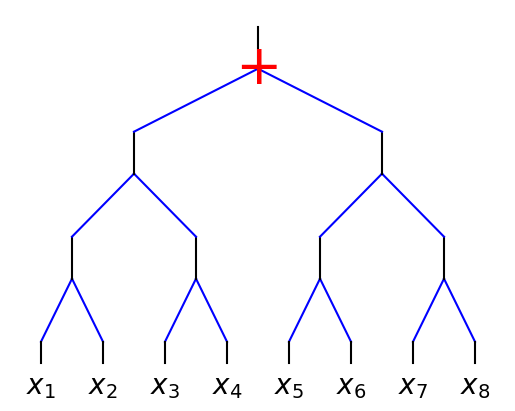

In [11]:
f = lambda x: ((x[:,[0]]**2 + x[:,[1]]**2) ** 2 + (x[:,[2]]**2 + x[:,[3]]**2) ** 2) ** 2 + ((x[:,[4]]**2 + x[:,[5]]**2) ** 2 + (x[:,[6]]**2 + x[:,[7]]**2) ** 2) ** 2
x = torch.rand(100,8) * 2 - 1
plot_tree(f, x, style='tree') # by default, style = 'tree'

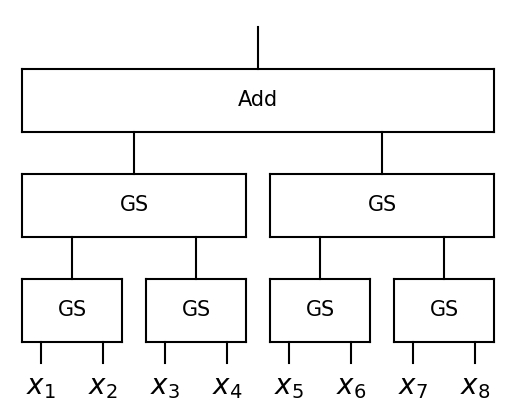

In [12]:
plot_tree(f, x, style='box')

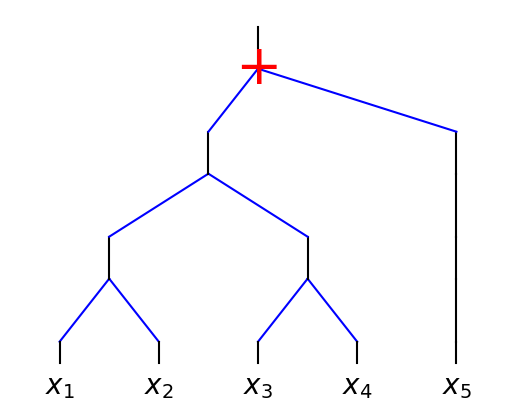

In [13]:
f = lambda x: ((x[:,[0]]**2 + x[:,[1]]**2) ** 2 + (x[:,[2]]**2 + x[:,[3]]**2) ** 2) ** 2 + x[:,[4]]**2
x = torch.rand(100,5) * 2 - 1
plot_tree(f, x, style='tree') # by default, style = 'tree'

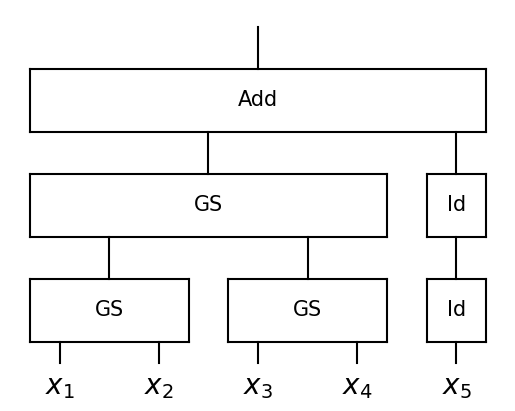

In [14]:
plot_tree(f, x, style='box')